In [1]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from cvxopt import matrix, solvers

### 0. Sample data

In [33]:
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 

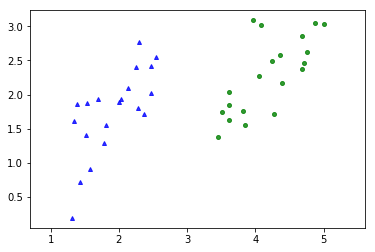

In [34]:
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
plt.axis('equal')
plt.plot()
plt.show()

### 1. Solve SVM using optimization of dual function

In [3]:
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V)) # see definition of V, K near eq (8)

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[8.54018321e-01 2.89132533e-10 1.37095535e+00 6.36030818e-10
  4.04317408e-10 8.82390106e-10 6.35001881e-10 5.49567576e-10
  8.33359230e-10 1.20982928e-10 6.86678649e-10 1.25039745e-10
  2.22497367e+00 4.05417905e-09 1.26763684e-10 1.99008949e-10
  2.13742578e-10 1.51537487e-10 3.75329509e-10 3.56161975e-10]]


In [35]:
p

<20x1 matrix, tc='d'>

In [4]:
epsilon = 1e-6 # just a small number, greater than 1e-9
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

w =  [[-2.00984381  0.64068336]]
b =  4.668560633868073


In [ ]:
w1*x1 + w2*x2 + b = 0

In [13]:
w[1][0]

0.6406833632392509

In [16]:
min(X[:,0])

1.7187598064720349

In [17]:
max(X[:,0])

2.3731901133931563

In [30]:
# 
sepX1 = np.linspace(2.3, 3.3, 100)
sepX2 = -b/w[1] - w[0]*sepX1/w[1]

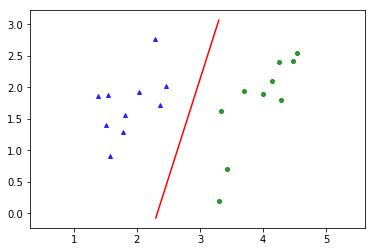

In [31]:
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
plt.plot(sepX1, sepX2, '-r', label="%f*x1 + %f*x2 + %f = 0"%(w[0], w[1], b))
plt.axis('equal')
plt.plot()
plt.show()

### 2. Solve SVM using gradient descent